## Observations and Insights
#### Looking over all the data, figures and tables I have observed the following:
* The distribution across the sex of the mice was farely even at 51% male and 49% female showing no biased towards a drugs effectiveness on a certain sex.
* It appears according to the data on the tumor volume, that the drug of Interest, Capomulin, and the drug Ramicane were the most promising and effective of all the drug regimens.
* Looking at the data and figures, one can make an inference that their is indeed a direct correlation between the average size of the tumors and the weights of the mice.
---

In [1]:
# Import Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import numpy as np

# Define file paths
mouse_metadata_path = 'data/Mouse_metadata.csv'
study_results_path = 'data/Study_results.csv'

# Read in the files
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='outer')

# Display the data table for preview
mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Check the number of mice.
num_mice = len(mouse_df['Mouse ID'].unique())
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_series = mouse_df.loc[mouse_df.duplicated(['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_series

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_df = mouse_df[mouse_df['Mouse ID'].isin(duplicate_series)]
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_df[mouse_df['Mouse ID'].isin(duplicate_series) == False]
clean_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Check the number of mice in the clean DataFrame.
num_mice = len(clean_mouse_df['Mouse ID'].unique())
num_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use this straighforward method, create multiple series and put them all in a dataframe at the end.
mean_tumor_vol = clean_mouse_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median_tumor_vol = clean_mouse_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
var_tumor_vol = clean_mouse_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
std_tumor_vol = clean_mouse_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem_tumor_vol = clean_mouse_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
summary_table1 = pd.DataFrame({'Mean Tumor Volume': mean_tumor_vol, 'Median Tumor Volume': median_tumor_vol,
                              'Tumor Volume Variance': var_tumor_vol, 'Tumor Volume Std. Dev.': std_tumor_vol,
                              'Tumor Volume Std. Err.': sem_tumor_vol})
summary_table1

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use method to produce everything with a single groupby function
summary_table2 = clean_mouse_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_table2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

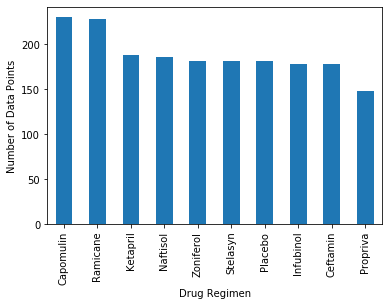

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
mice_count = clean_mouse_df['Drug Regimen'].value_counts()
mice_count.plot.bar()
plt.ylabel('Number of Data Points')
plt.xlabel('Drug Regimen')
plt.show()

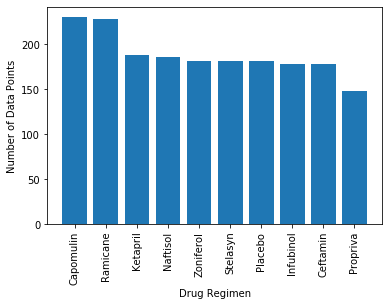

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(mice_count))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, mice_count, align='center')
plt.xticks(tick_locations, mice_count.index.values, rotation='vertical')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.show()

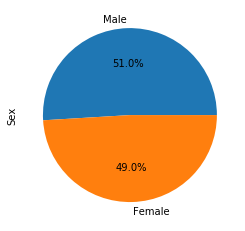

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = clean_mouse_df['Sex'].value_counts()
gender_count.plot(kind='pie', autopct='%1.1f%%', shadow=False, legend = False)
plt.ylabel('Sex')
plt.show()

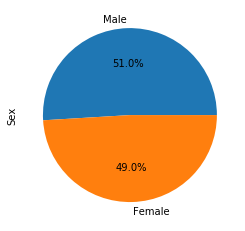

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_count.values, labels = gender_count.index, autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across each of the treatment regimens: 
# Start by getting the last (greatest) timepoint for each mouse
grouped_id = clean_mouse_df.groupby('Mouse ID')
last_timepoint = grouped_id['Timepoint'].max()
max_data = last_timepoint.reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combined_data = pd.merge(max_data, clean_mouse_df, how = 'left', on = ['Mouse ID', 'Timepoint'])
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [16]:
# Put 4 treatment names into a list for use with a for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create a empty list to fill with tumor vol data (for plotting) (hint: each element of the list will be series)
tumor_vol_list = []

# For each treatment in the list, calculate the IQR and quantitatively 
# determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    greatest_tumor_data = combined_data.loc[combined_data['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    # add subset to tumor volume data list
    tumor_vol_list.append(greatest_tumor_data)
    # Determine outliers using upper and lower bounds
    quartiles = greatest_tumor_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = greatest_tumor_data.loc[(greatest_tumor_data < lower_bound) | (greatest_tumor_data > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


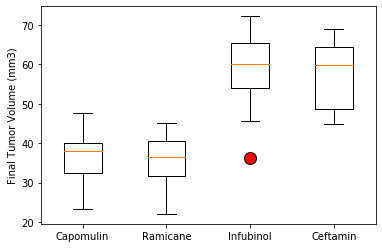

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(treatment_list)
flierprops = dict(marker='o', markerfacecolor='r', markersize=12)
ax1.boxplot(tumor_vol_list, flierprops=flierprops)
plt.show()

## Line and Scatter Plots

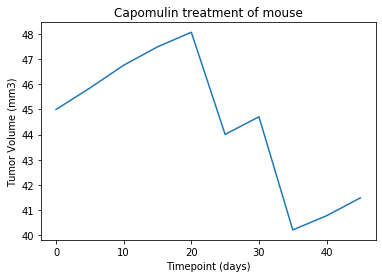

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_data = clean_mouse_df.loc[clean_mouse_df['Drug Regimen'] == 'Capomulin']
l509_data = capomulin_data.loc[capomulin_data['Mouse ID'] == 'l509']
plt.plot(l509_data['Timepoint'], l509_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse')
plt.show()

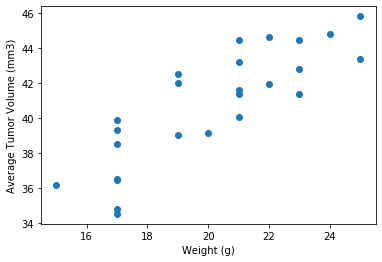

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_avg = capomulin_data.groupby('Mouse ID').mean()
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


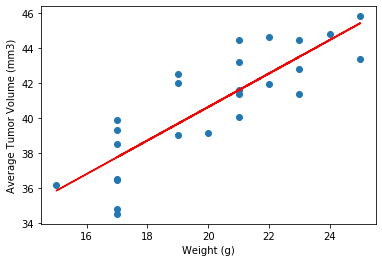

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_avg['Weight (g)']
y_values = capomulin_avg['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f'The correlation between mouse weight and the average tumor volume is {rvalue:.2f}')
plt.show()

In [23]:
combined_final_max = combined_data.groupby('Drug Regimen').mean()
combined_final_max

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Drug Regimen,,,,,
Capomulin,41.000000,36.667568,1.280000,14.040000,20.120000
Ceftamin,30.600000,57.753977,1.720000,12.800000,27.400000
Infubinol,30.600000,58.178246,1.600000,16.400000,27.320000
Ketapril,32.600000,62.806191,1.920000,14.720000,28.080000
Naftisol,32.200000,61.205757,2.000000,12.240000,27.240000
Placebo,31.200000,60.508414,2.080000,10.680000,28.040000
Propriva,25.833333,56.493884,1.541667,9.416667,27.291667
Ramicane,40.600000,36.191390,1.200000,10.840000,20.000000
Stelasyn,32.708333,61.001707,1.458333,13.125000,27.875000


In [27]:
first_timepoint = grouped_id['Timepoint'].min()
min_data = first_timepoint.reset_index()
combined_min_data = pd.merge(min_data, clean_mouse_df, how = 'left', on = ['Mouse ID', 'Timepoint'])
combined_final_min = combined_min_data.groupby('Drug Regimen').mean()
combined_final_min

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Drug Regimen,,,,,
Capomulin,0.0,45.0,0.0,14.040000,20.120000
Ceftamin,0.0,45.0,0.0,12.800000,27.400000
Infubinol,0.0,45.0,0.0,16.400000,27.320000
Ketapril,0.0,45.0,0.0,14.720000,28.080000
Naftisol,0.0,45.0,0.0,12.240000,27.240000
Placebo,0.0,45.0,0.0,10.680000,28.040000
Propriva,0.0,45.0,0.0,9.416667,27.291667
Ramicane,0.0,45.0,0.0,10.840000,20.000000
Stelasyn,0.0,45.0,0.0,13.125000,27.875000
